In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Next_Close']


/tmp/ipython-input-2-1281027355.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


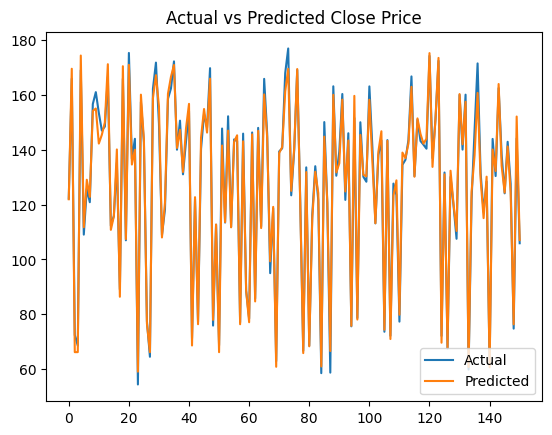

MSE: 11.21288054374096


In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Plot actual vs predicted
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

# Metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
